In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
customer = pd.read_csv("E:\\ANALYTIXLAB CASS\Projects\Project work Python\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [5]:
repayment = pd.read_csv("E:\\ANALYTIXLAB CASS\Projects\Project work Python\Case Study 2 - Credit Card Case Study\Repayment.csv")
repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [6]:
spend = pd.read_csv("E:\\ANALYTIXLAB CASS\Projects\Project work Python\Case Study 2 - Credit Card Case Study\spend.csv")
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


# 1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.


In [7]:
customer[customer.Age<18] = customer['Age'].mean()

In [8]:
customer.Age.min()

19.0

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [9]:
customer_spend = pd.merge(left = customer, right = spend, on= "Customer", how = "right")
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,1496,4-Feb-06,BUS TICKET,356872.73
1496,NaN,A68,NaN,NaN,NaN,NaN,NaN,NaN,1497,25-Mar-06,BUS TICKET,204971.10
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498,31-Mar-06,BUS TICKET,50449.44
1498,NaN,A70,NaN,NaN,NaN,NaN,NaN,NaN,1499,23-Mar-06,BUS TICKET,80593.94


In [10]:
customer_spend.isna().sum()

No          70
Customer     0
Age         70
City        70
Product     70
Limit       70
Company     70
Segment     70
Sl No:       0
Month        0
Type         0
Amount       0
dtype: int64

In [11]:
customer_spend = customer_spend.dropna()

In [12]:
customer_spend.loc[customer_spend["Amount"]>customer_spend["Limit"],"Amount"]=customer_spend["Limit"]/2

In [13]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1493,65.0,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,1494,23-Feb-05,BUS TICKET,98178.42
1494,66.0,A66,77.0,PATNA,Gold,500000.0,C28,Govt,1495,3-Feb-05,BUS TICKET,162670.43
1495,67.0,A67,54.0,CHENNAI,Gold,500000.0,C29,Normal Salary,1496,4-Feb-06,BUS TICKET,356872.73
1497,69.0,A69,33.0,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498,31-Mar-06,BUS TICKET,5000.00


In [14]:
customer_spend.duplicated(subset = "Amount").sum()

597

c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [15]:
customer_repayment = pd.merge(left = customer, right = repayment, on ="Customer", how = 'right' )
customer_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
customer_repayment.isna().sum()

No              93
Customer        23
Age             93
City            93
Product         93
Limit           93
Company         93
Segment         93
SL No:          24
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [17]:
customer_repayment = customer_repayment.drop("Unnamed: 4",axis = 1)
customer_repayment = customer_repayment.dropna()

In [18]:
customer_repayment.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      0
Month       0
Amount      0
dtype: int64

In [19]:
customer_repayment.loc[customer_repayment["Amount"]>customer_repayment["Limit"],"Amount"] = customer_repayment["Limit"]

In [20]:
customer_repayment.loc[customer_repayment["Amount"]>customer_repayment["Limit"]]

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount


# 2. From the above dataset create the following summaries:


a. How many distinct customers exist?


In [21]:
customer["Customer"].nunique()

95

b. How many distinct categories exist?


In [22]:
customer["Segment"].nunique()

6

c. What is the average monthly spend by customers?


In [23]:
spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [24]:
# The month column is in object data type so first converting into datetime format
spend["Month"] = pd.to_datetime(spend.Month, format = '%d-%b-%y')


In [25]:
# Now creating a new column for month only
spend["format_month"] = pd.to_datetime(spend["Month"]).dt.strftime("%B")


In [26]:
# calculating average spend per month
spend.groupby("format_month")["Amount"].mean()
# result is not in sorted order so first we have to create new column to sort the data

format_month
April        236671.847533
August       236056.328571
December     208987.020357
February     233037.216471
January      256221.133553
July         268042.287143
June         241329.181250
March        246255.783723
May          241277.023476
November     249099.824405
October      215352.487857
September    219369.892143
Name: Amount, dtype: float64

In [27]:
#Here is the new column
spend["month_number"] = spend["Month"].dt.month

In [28]:
# This is the final answer
spend.groupby(["month_number","format_month"])["Amount"].mean()


month_number  format_month
1             January         256221.133553
2             February        233037.216471
3             March           246255.783723
4             April           236671.847533
5             May             241277.023476
6             June            241329.181250
7             July            268042.287143
8             August          236056.328571
9             September       219369.892143
10            October         215352.487857
11            November        249099.824405
12            December        208987.020357
Name: Amount, dtype: float64

d. What is the average monthly repayment by customers?


In [29]:
repayment.isna().sum()
#Unnamed: 4 is total null column so we can delete this column 

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [30]:
repayment = repayment.drop("Unnamed: 4", axis = 1)

In [31]:
repayment
# There are still some rows left which has null values so we can delete them

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
...,...,...,...,...
1518,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN


In [32]:
repayment = repayment.dropna(subset = "Customer")
# the table is filtered now

In [33]:
repayment.isna().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [34]:
repayment["Month"] = pd.to_datetime(repayment.Month, format = "%d-%b-%y")
#Month data type is changed to datetime

C:\Users\ataus\AppData\Local\Temp\ipykernel_124\1745190060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment["Month"] = pd.to_datetime(repayment.Month, format = "%d-%b-%y")


In [35]:
repayment["format_month"] = pd.to_datetime(repayment["Month"]).dt.strftime("%B")
#added new column to group the data only by month

C:\Users\ataus\AppData\Local\Temp\ipykernel_124\2274757019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment["format_month"] = pd.to_datetime(repayment["Month"]).dt.strftime("%B")


In [36]:
repayment["month_number"] = repayment["Month"].dt.month
#added new column to sort the data month wise

C:\Users\ataus\AppData\Local\Temp\ipykernel_124\455496625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repayment["month_number"] = repayment["Month"].dt.month


In [37]:
repayment.groupby(["month_number","format_month"])["Amount"].mean()
#this is our final answer

month_number  format_month
1             January         245121.019624
2             February        248756.162368
3             March           241654.966393
4             April           259649.413200
5             May             257669.622782
6             June            220647.477083
7             July            253512.325102
8             August          254564.734898
9             September       226865.354750
10            October         240307.718333
11            November        229867.344524
12            December        286557.952500
Name: Amount, dtype: float64

e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [281]:
repayment_spend = pd.merge(repayment, spend, on ="Customer" )
repayment_spend

,SL No:,Customer,Month_x,Amount_x,format_month_x,month_number_x,Sl No:,Month_y,Type,Amount_y,format_month_y,month_number_y
0,NaN,A1,2004-01-12,495414.75,January,1,1,2004-01-12,JEWELLERY,485470.80,January,1
1,NaN,A1,2004-01-12,495414.75,January,1,2,2004-01-03,PETRO,410556.13,January,1
2,NaN,A1,2004-01-12,495414.75,January,1,3,2004-01-15,CLOTHES,23740.46,January,1
3,NaN,A1,2004-01-12,495414.75,January,1,4,2004-01-25,FOOD,484342.47,January,1
4,NaN,A1,2004-01-12,495414.75,January,1,5,2005-01-17,CAMERA,369694.07,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37279,349.0,A7,2004-01-03,473662.61,January,1,277,2006-05-03,AIR TICKET,305050.62,May,5
37280,349.0,A7,2004-01-03,473662.61,January,1,295,2005-02-23,CAMERA,314704.54,February,2
37281,349.0,A7,2004-01-03,473662.61,January,1,313,2004-01-12,AUTO,498358.28,January,1
37282,349.0,A7,2004-01-03,473662.61,January,1,331,2004-01-25,TRAIN TICKET,461282.47,January,1


In [283]:
repayment_spend.isna().sum()

SL No:            18
Customer           0
Month_x            0
Amount_x           0
format_month_x     0
month_number_x     0
Sl No:             0
Month_y            0
Type               0
Amount_y           0
format_month_y     0
month_number_y     0
dtype: int64

In [ ]:
# As per the question the monthly rate of interest is 2.9%

f. What are the top 5 product types?


In [307]:
customer.drop_duplicates(subset = "Product")["Product"]

0         Gold
1       Silver
2     Platimum
13       46.49
Name: Product, dtype: object

g. Which city is having maximum spend?


In [379]:
customer_spend.groupby("City").agg({"Amount":"sum"}).reset_index().sort_values("Amount", ascending = False).head(1)

,City,Amount
2,CALCUTTA,41108132.3


h. Which age group is spending more money?


<Axes: xlabel='Age', ylabel='Amount'>

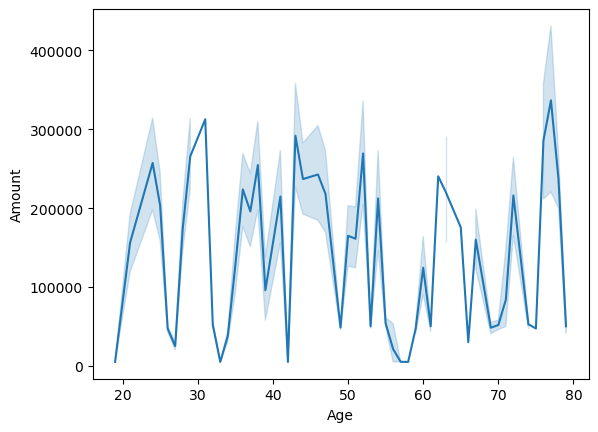

In [380]:
sns.lineplot(data=customer_spend, x="Age", y = "Amount")
# As per the graph 75-80 yr age group is spending the most amount of money

i. Who are the top 10 customers in terms of repayment?

In [352]:
customer_repayment.groupby("Customer").agg({"Amount":"sum"}).reset_index().sort_values("Amount").tail(10)
# These are the top 10 customers in term of repayment

,Customer,Amount
39,A46,7861541.41
41,A48,8292416.75
4,A12,8334760.16
38,A45,8448334.87
36,A43,8489871.46
13,A21,9056336.15
14,A22,9372561.68
5,A13,9572000.66
55,A60,9876290.74
56,A61,10539142.91


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [41]:
customer_spend["Month"] = pd.to_datetime(customer_spend.Month, format = "%d-%b-%y")

C:\Users\ataus\AppData\Local\Temp\ipykernel_124\539696467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_spend["Month"] = pd.to_datetime(customer_spend.Month, format = "%d-%b-%y")


In [42]:
customer_spend["year"] = customer_spend["Month"].dt.year

C:\Users\ataus\AppData\Local\Temp\ipykernel_124\2629312296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_spend["year"] = customer_spend["Month"].dt.year


In [43]:
city_spend = customer_spend.groupby(["year","City"]).agg({"Amount":"sum"}).reset_index()
city_spend
# city wise spend on yearly basis

,year,City,Amount
0,2004,BANGALORE,9864730.49
1,2004,BOMBAY,8417207.50
2,2004,CALCUTTA,10014837.28
3,2004,CHENNAI,4877327.74
4,2004,COCHIN,10330074.59
5,2004,DELHI,3858180.19
6,2004,PATNA,3942321.60
7,2004,TRIVANDRUM,4776781.51
8,2005,BANGALORE,10449512.34
9,2005,BOMBAY,10198811.26


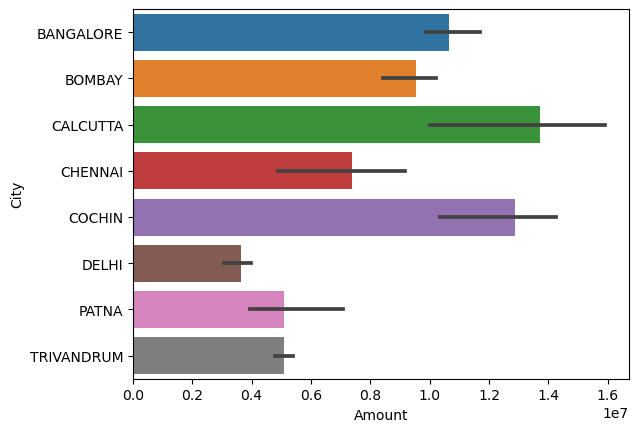

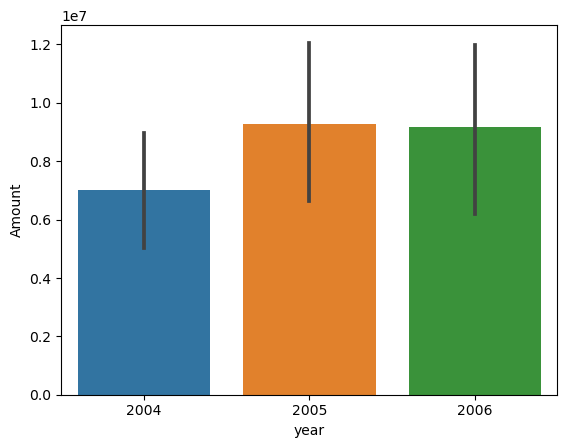

In [44]:
sns.barplot(data = city_spend, x = "Amount", y = "City")
plt.show()
sns.barplot(data = city_spend, y = "Amount", x = "year")
plt.show()

# 4. Create graphs for
a. Monthly comparison of total spends, city wise


In [45]:
month_spend = spend.groupby("format_month").agg({"Amount":"sum"}).reset_index()

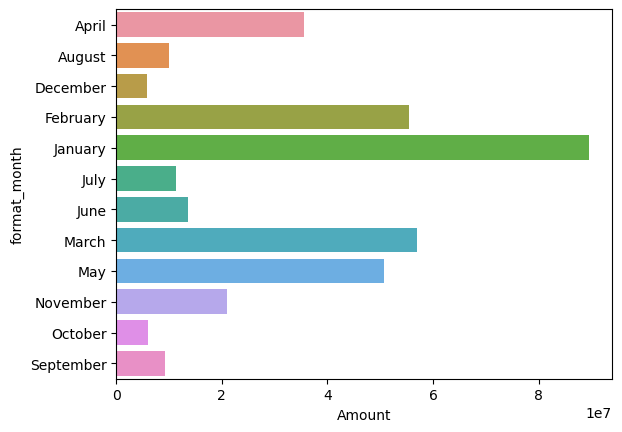

In [46]:
sns.barplot(data = month_spend, x = "Amount", y = "format_month")
plt.show()

b. Comparison of yearly spend on air tickets


In [47]:
year_spend = customer_spend[customer_spend.Type == "AIR TICKET"].groupby("year").agg({"Amount":"sum"}).reset_index()

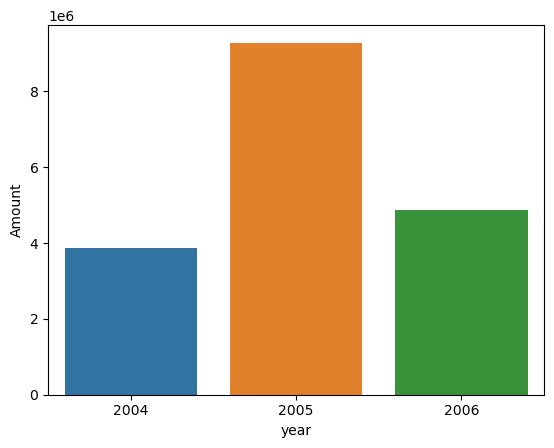

In [48]:
sns.barplot(data = year_spend, x = "year", y = "Amount")
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality
that exists in terms of spend)

In [49]:
month_spend

,format_month,Amount
0,April,35500777.13
1,August,9914365.80
2,December,5851636.57
3,February,55462857.52
4,January,89421175.61
5,July,11257776.06
6,June,13514434.15
7,March,56885086.04
8,May,50668174.93
9,November,20924385.25


5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [57]:
cust_spend_repayment = pd.merge(left = customer_spend, right = repayment, on = "Customer")

In [58]:
def bestcustomer(n):
    for n[i] in n:
        n["Customer"]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,year,SL No:,Month_y,Amount_y,format_month,month_number
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,NaN,2004-01-12,495414.75,January,1
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,2.0,2004-01-03,245899.02,January,1
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,3.0,2004-01-15,259490.06,January,1
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,4.0,2004-01-25,437555.12,January,1
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004,5.0,2005-01-17,165972.88,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35339,7.0,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,349,2006-04-19,JEWELLERY,50000.5,2006,277.0,2005-11-22,55108.71,November,11
35340,7.0,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,349,2006-04-19,JEWELLERY,50000.5,2006,295.0,2005-12-03,429700.12,December,12
35341,7.0,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,349,2006-04-19,JEWELLERY,50000.5,2006,313.0,2005-02-23,344628.72,February,2
35342,7.0,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,349,2006-04-19,JEWELLERY,50000.5,2006,331.0,2006-03-31,336264.37,March,3


In [50]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3.0,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4.0,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5.0,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96.0,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97.0,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98.0,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99.0,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [51]:
spend

,Sl No:,Customer,Month,Type,Amount,format_month,month_number
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,1
1,2,A1,2004-01-03,PETRO,410556.13,January,1
2,3,A1,2004-01-15,CLOTHES,23740.46,January,1
3,4,A1,2004-01-25,FOOD,484342.47,January,1
4,5,A1,2005-01-17,CAMERA,369694.07,January,1
...,...,...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73,February,2
1496,1497,A68,2006-03-25,BUS TICKET,204971.10,March,3
1497,1498,A69,2006-03-31,BUS TICKET,50449.44,March,3
1498,1499,A70,2006-03-23,BUS TICKET,80593.94,March,3


In [52]:
repayment

,SL No:,Customer,Month,Amount,format_month,month_number
0,NaN,A1,2004-01-12,495414.75,January,1
1,2.0,A1,2004-01-03,245899.02,January,1
2,3.0,A1,2004-01-15,259490.06,January,1
3,4.0,A1,2004-01-25,437555.12,January,1
4,5.0,A1,2005-01-17,165972.88,January,1
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,5
1496,1497.0,A68,2006-05-10,319836.49,May,5
1497,1498.0,A69,2006-07-11,247628.45,July,7
1498,1499.0,A70,2005-08-12,454016.51,August,8


In [100]:
month_wise_sale = repayment.groupby(["format_month","month_number"]).agg({"Amount":"sum"}).sort_values("month_number").reset_index()

In [112]:
month_wise_sale.head()

,format_month,month_number,Amount
0,January,1,78193605.26
1,February,2,56716405.02
2,March,3,52922437.64
3,April,4,38947411.98
4,May,5,68540119.66


In [113]:
repayment[repayment.format_month == "May"]

,SL No:,Customer,Month,Amount,format_month,month_number
24,25.0,A25,2004-05-05,246473.42,May,5
25,26.0,A26,2006-05-06,470982.16,May,5
26,27.0,A27,2005-05-07,357375.59,May,5
27,28.0,A28,2006-05-08,326050.15,May,5
28,29.0,A29,2005-05-09,215083.37,May,5
...,...,...,...,...,...,...
1492,1493.0,A64,2006-05-06,110614.61,May,5
1493,1494.0,A65,2005-05-07,230667.34,May,5
1494,1495.0,A66,2006-05-08,113094.58,May,5
1495,1496.0,A67,2005-05-09,55638.77,May,5
